In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

--2022-10-11 19:23:27--  https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py [following]
--2022-10-11 19:23:28--  https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10611 (10K) [text/plain]
Saving to: ‘lab_helper.py’

lab_helper.py       100%[===================>]  10.36K  --.-KB/s    in 0s      

2022-10-11 19:23:28 (61.8 MB/s) - ‘lab_helper.py’ saved [10611/10611]



In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

# Graficamos

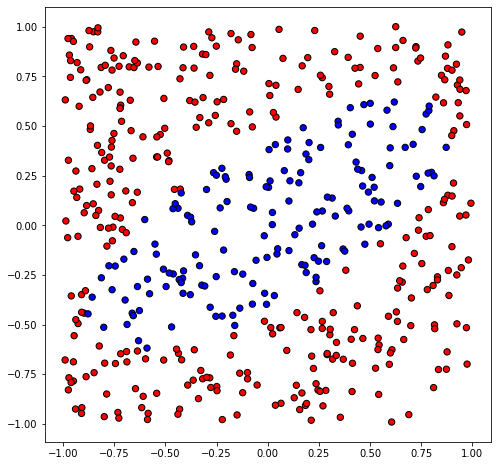

In [6]:
X, y = generate_elipse_data()
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [7]:
def modelParameters(model):
  parameterDictionary = {}
  if type(model) == GaussianNB:
    parameterDictionary["type"] = "GaussianNB"
    #Probabilidades a priori de las clases
    parameterDictionary["prior1"], parameterDictionary["prior2"] = model.class_prior_
    #Varianza de cada feature para cada clase
    parameterDictionary["var1"], parameterDictionary["var2"] = model.var_
    #Media de cada feature para cada clase
    parameterDictionary["mu1"], parameterDictionary["mu2"] = model.theta_
  elif type(model) == QuadraticDiscriminantAnalysis:
    parameterDictionary["type"] = "QDA"
    #Probabilidades a priori de las clases
    parameterDictionary["prior1"], parameterDictionary["prior2"] = model.priors_
    #Varianza de cada feature para cada clase
    parameterDictionary["var1"], parameterDictionary["var2"] = model.covariance_
    #Media de cada feature para cada clase
    parameterDictionary["mu1"], parameterDictionary["mu2"] = model.means_
  return parameterDictionary


###Modelo Naive Bayes


priors=None, var_smoothing=1e-09  
generate_elipse_data()

In [21]:
#model.var_ #-> 4 parametros
#model.theta_ ->4 parametros

array([[0.41777554, 0.43386792],
       [0.19980628, 0.09558933]])

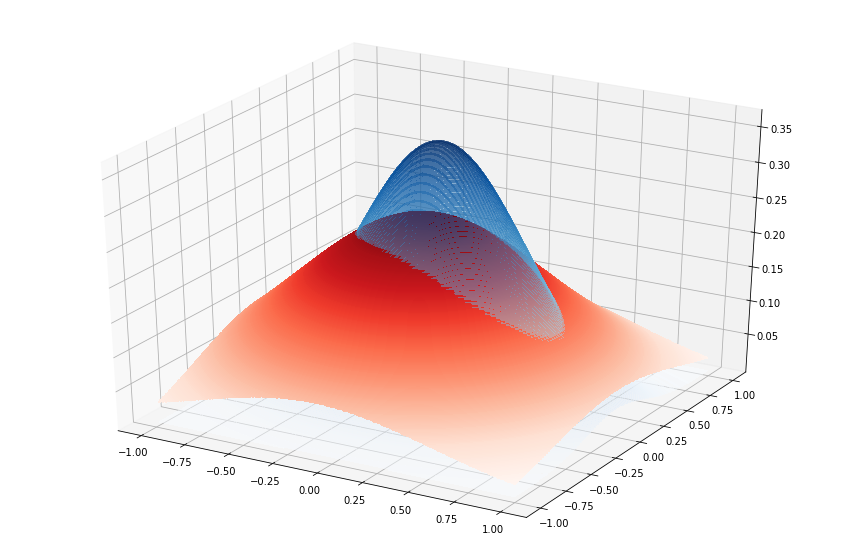

****************************************************************************************************
****************************************************************************************************


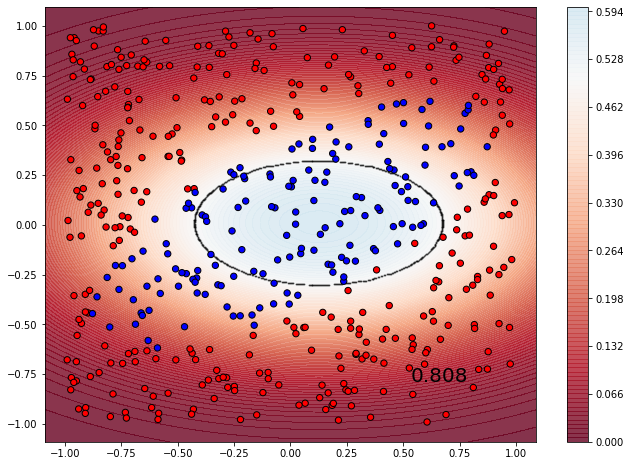

In [17]:
X, y = generate_elipse_data()
#Instanciamos el modelo
model = GaussianNB(priors=None, var_smoothing=1e-09)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)


priors=None, var_smoothing=1e-09  
generate_gaussians_distributions()

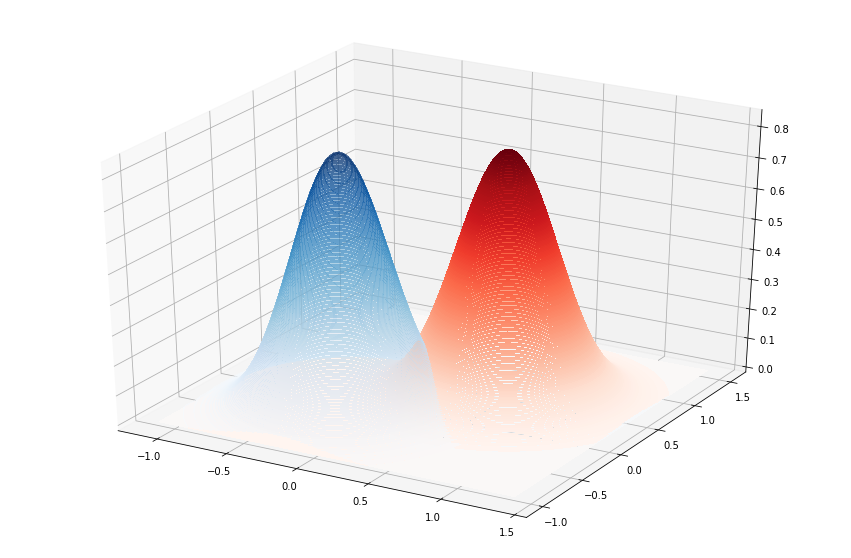

****************************************************************************************************
****************************************************************************************************


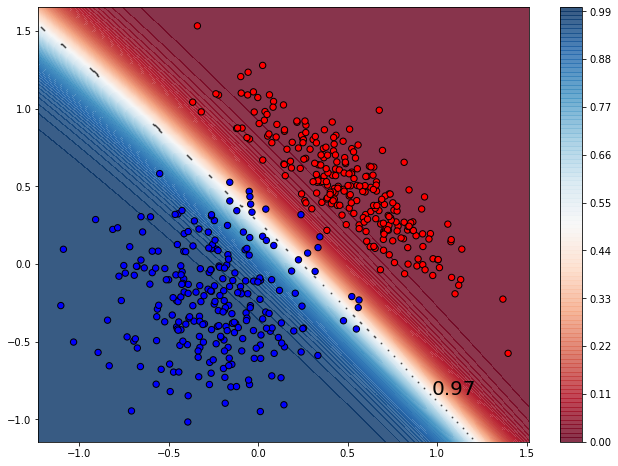

In [9]:
X, y = generate_gaussians_distributions()
#Instanciamos el modelo
model = GaussianNB(priors=None, var_smoothing=1e-09)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [28]:
#matriz covarianza 8 parametros
#Medias 4 parametros 

array([[ 0.50016958,  0.50174934],
       [-0.24854368, -0.23132772]])

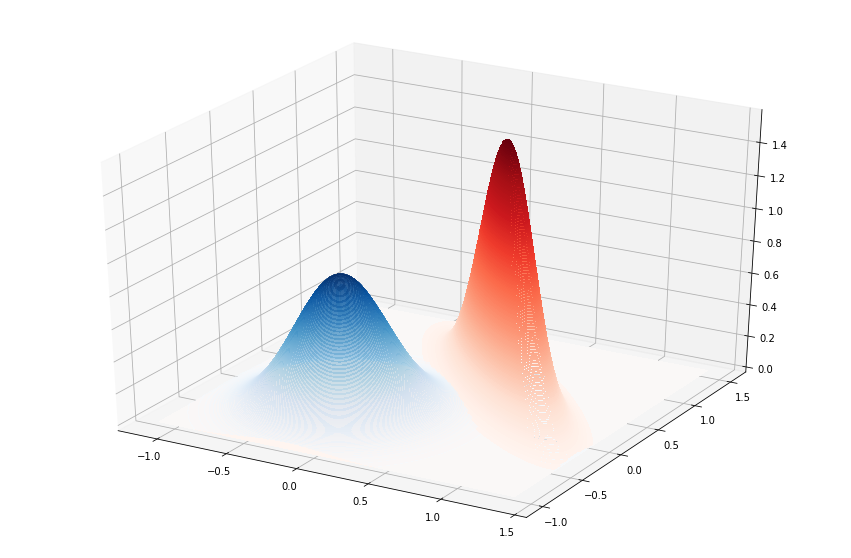

****************************************************************************************************
****************************************************************************************************


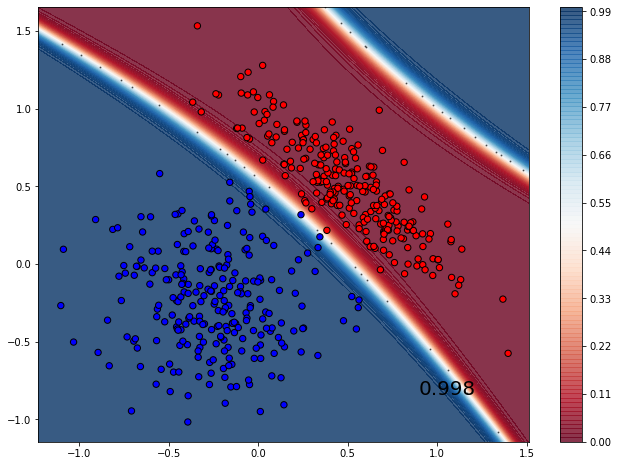

In [22]:
X, y = generate_gaussians_distributions()
#Instanciamos el modelo
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

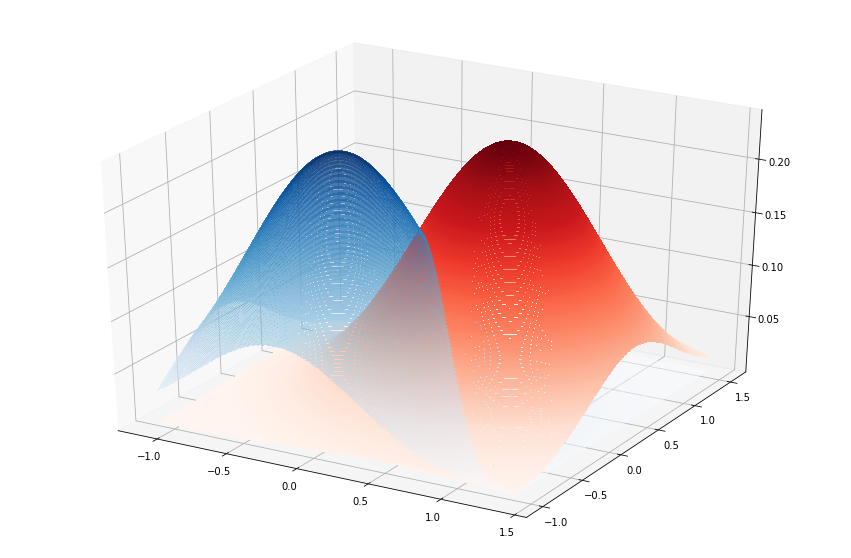

****************************************************************************************************
****************************************************************************************************


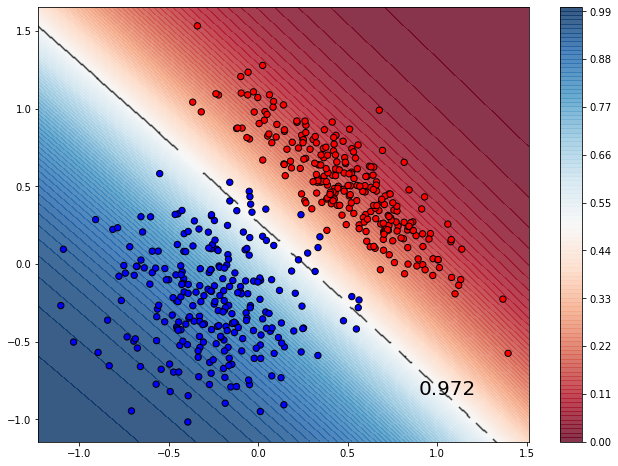

In [11]:
X, y = generate_gaussians_distributions()
#Instanciamos el modelo
model = GaussianNB(priors=None, var_smoothing=1)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

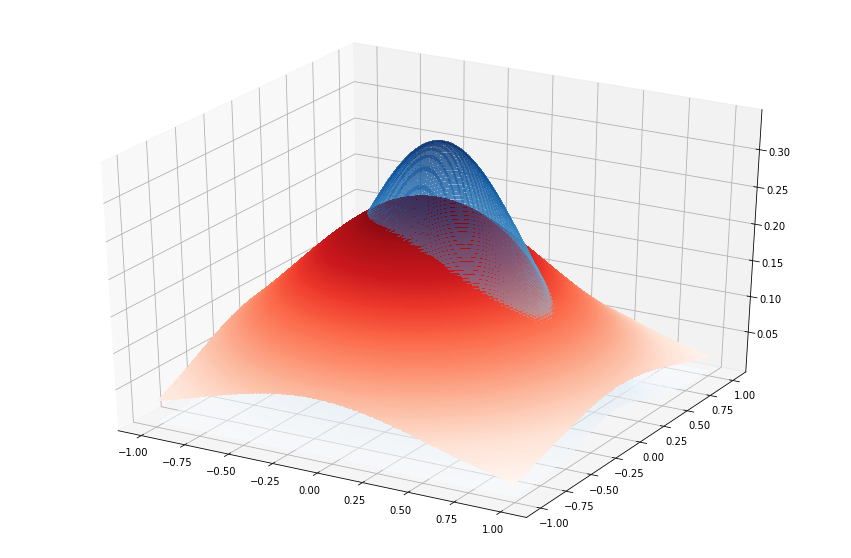

****************************************************************************************************
****************************************************************************************************


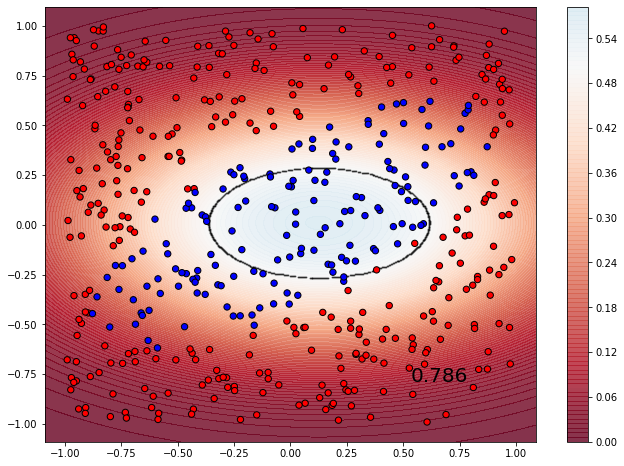

In [12]:
X, y = generate_elipse_data()
#Instanciamos el modelo
model = GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

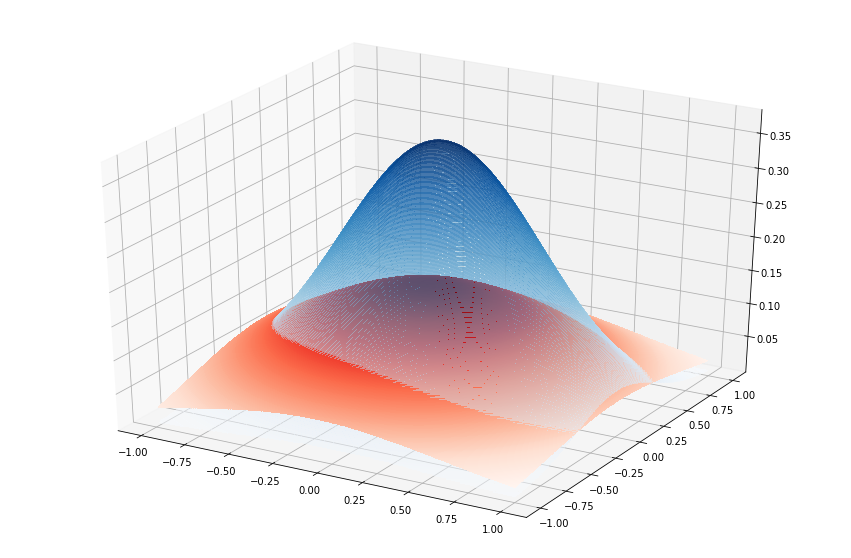

****************************************************************************************************
****************************************************************************************************


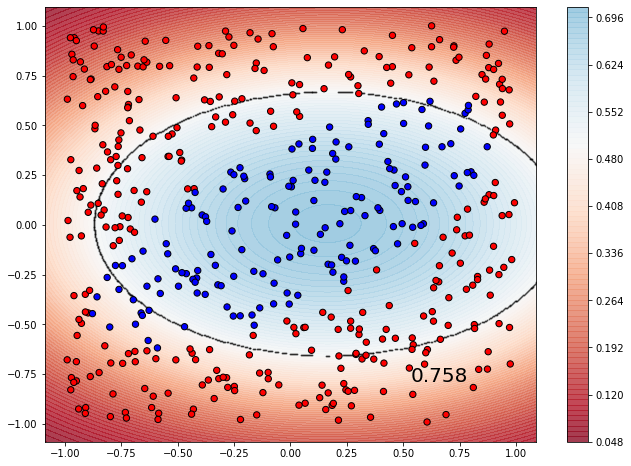

In [13]:
X, y = generate_elipse_data()
#Instanciamos el modelo
model = GaussianNB(priors=[0.5, 0.5], var_smoothing=0.2)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [14]:
score

0.758

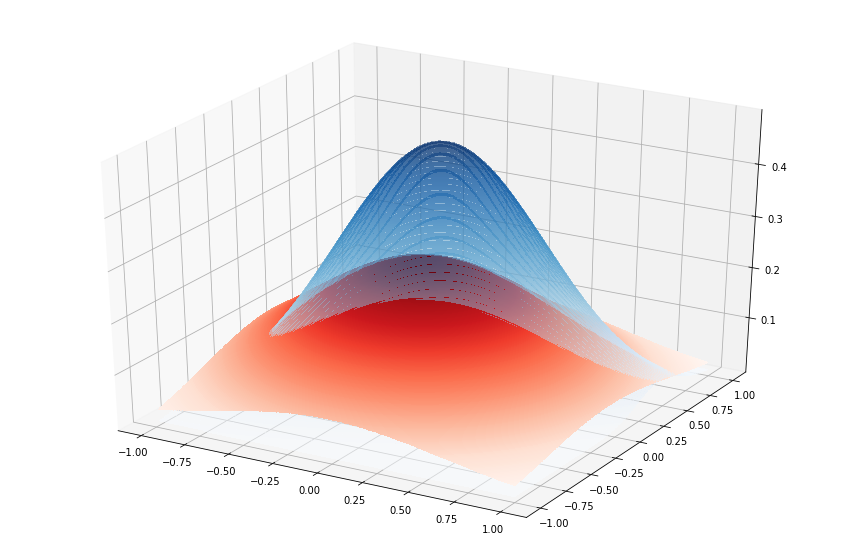

****************************************************************************************************
****************************************************************************************************


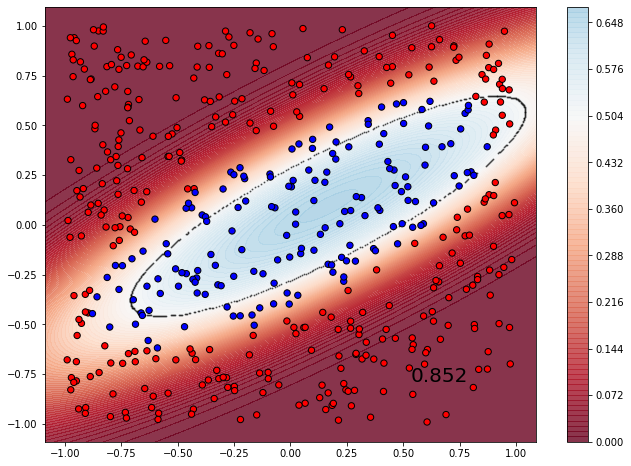

In [15]:
X, y = generate_elipse_data()
#Instanciamos el modelo
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)
# Entrenamiento del modelo
model.fit(X,y)
parameterModels = modelParameters(model)
plot_gaussians(X, parameterModels["mu1"], parameterModels["var1"], parameterModels["mu2"], parameterModels["var2"], parameterModels["prior1"], parameterModels["prior2"])
print(100*"*")
print(100*"*")
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [16]:
score

0.852